# 1. Подготовим необходимые библиотеки и установим дополнительные опции датафреймов


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

# 2. Функции


In [10]:

def ad_none(x):
    """Функция избавления от пропусков"""
    '''Данная функция необходима для избавления от пропусков в датасете'''


    if x == '':
        return None
    else:
        return x


def display_info(columns):
    """Функция показа уникальных значений их кол-ва"""

    '''Данная функция необходима для анализа качественных признаков'''

    display(pd.DataFrame(stud[columns].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (stud[columns].value_counts()>10).sum())
    print("Уникальных значений:", stud[columns].nunique())
    stud.loc[:, [columns]].info()

def cor_stat(columns):
    """Функция анализа с момощью межквартильного размаха"""

    '''Данная функция необходима для того, чтобы отсеить выбросы, где они не очевидны'''
    
    IQR = stud[columns].quantile(0.75) - stud[columns].quantile(0.25)
    perc25 = stud[columns].quantile(0.25)
    perc75 = stud[columns].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
  
    stud[columns].loc[stud[columns].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, label = 'IQR')
  
    plt.legend()


def get_boxplot(columns):
    """функция вывода box plot для качественного признака"""

    '''Данная функция нужна для анализа номинативных переменных'''
    
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=columns, y='score',
                data=stud.loc[stud.loc[:, columns].isin(stud.loc[:, columns].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + columns)
    plt.show()


def get_stat_dif(column):
    """Функция теста Стьюдента"""

    '''Данная функция необходима для теста номинативных параметров'''
    
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# 3. В начале было слово и слово это "Анализ"

## Смотрим на распределение признака и количество уникальных значений

### Для начала рассмотрим распределение признака у числовых показателей, чтобы выявить выбросы

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'studytime, granular'}>,
        <AxesSubplot:title={'center':'famrel'}>],
       [<AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>],
       [<AxesSubplot:title={'center':'score'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

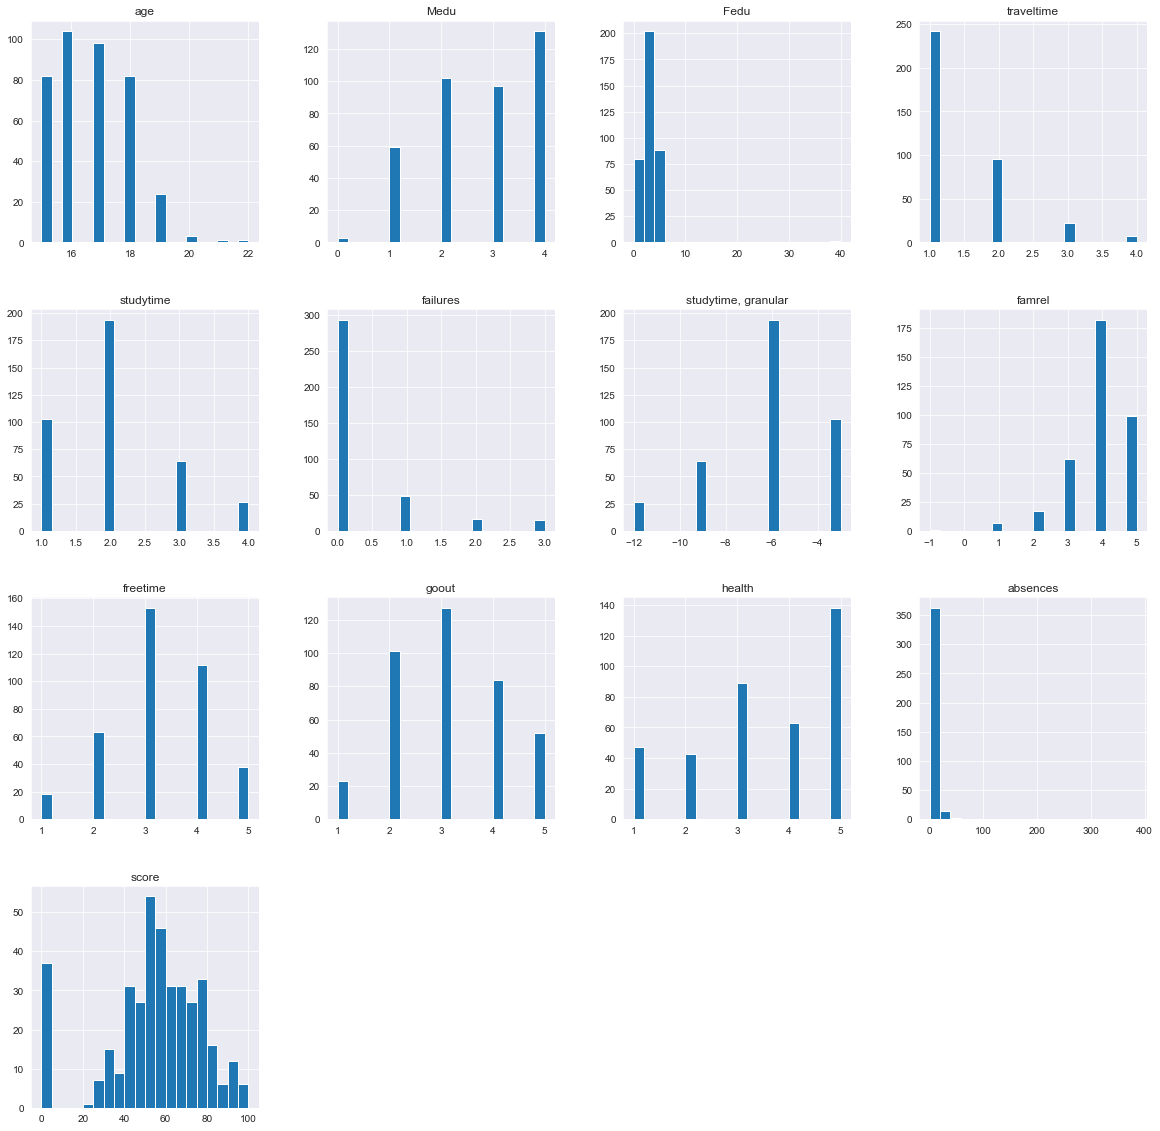

In [11]:
stud.hist(figsize=(20, 20), bins=20)

Таким образом мы сразу видим распределения числовых признакови сразу же сделать выводы относительно их

Итак, по порядку:

1.  age — возраст ученика (от 15 до 22)



> Здесь мы видим, что распределение нормальное, однако после 18 лет количество учащихся резко падает, что можно объяснить тем, что или эти ученики проходят вечернюю школу, или эти ученики имеют особенности из-за которых к ним нужен особый подход. Если ms мы расширяли график в лево, то сскорее всего увидели такоое же распределение вундеркиндов, поэтому для полноты картины мы оставим  переменную без изменений


2. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

> Выбросы не наблюдаются, видна тенденция роста, оставляем без изменений



3. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

> Тут мы можем наблюдать выброс, давайте проанализируем его.






In [12]:
display_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB




> Среди данных выбивается значение 40, что можно посчитать ошибкой при написании, которую мы исправим, убрав лишний нуль




In [13]:
stud.loc[stud['Fedu']==40, 'Fedu'] = 4
display_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB



4. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

> Выбросов нет, видим тренд на понижение



5. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

> Здесь мы видим нормальное распределение, выросы не обнаружены



6. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

> Мы видим экспонециальную низсходящую, выбросы так же не наблюдаются, соответственно можно сделать,вывод, что данный параметр можно оставить 






7.  studytime, granular

> Данный параметр, зеркально отражает другой параметр - studytime, однако не совсем понятно, что именно он описывает 



8. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

> Отрадно видеть, что у большинства учеников, хорошие отношения с семьей, а также, что это нормальное распределение, которое не имеет выбросов



9. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

> В данном случае наблюдается нормальное распределение без выбросов



10. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

> Аналочино предыдущему



11. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

> Идет тренд на улучшение самочувствия 



12. absences — количество пропущенных занятий

> На данном графике мы видем, что основная часть ответов сконцентрирована в пределах сотни, соответственно, что лежит за её пределами уже с уверенностью можно считать выбросами, поэтому данный параметр необходимо обработать





In [14]:
stud = stud.loc[stud['absences'] <= 100]

<AxesSubplot:>

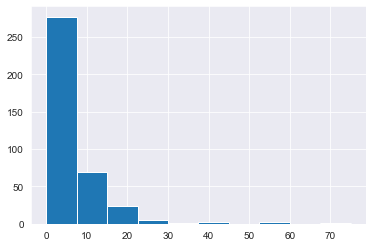

In [15]:
stud['absences'].hist()

Тут все ещё видны выбросы, скорее всего это ученики, которые целенаправленно прогуливают школу, или они очень серьезно болеют из-за чего им приходится так много пропускать занятия

<AxesSubplot:>

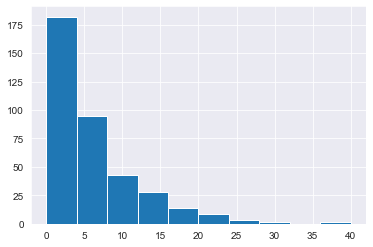

In [16]:
stud = stud.loc[stud['absences'] <= 40]
stud['absences'].hist()

Теперь мы видим экспонециальную регресию, что говорит нам о том, что большиство учеников, прогуляло не более 5 занятий


13. score — баллы по госэкзамену по математике


>На данном графике мы видим нормальное распределение с выбивающимися из общей картины полным провалом экзамена почти 40 учеников, скорее всего это люди, которые пропустили экзамент, стоит использовать межквартильный размах для анализа




25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


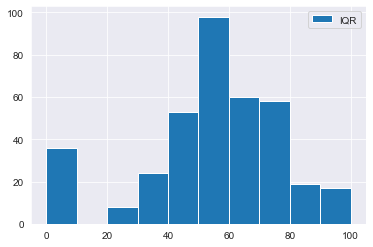

In [17]:
stud['score'].describe()
cor_stat('score')

Така как метод межквартильного размаха ничего не поменял, то придерживаясь здравого смысламожно убрать нули

<AxesSubplot:>

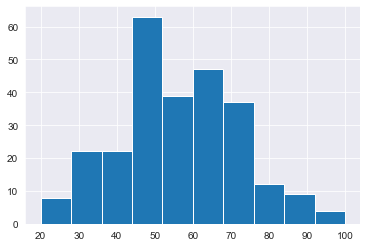

In [18]:
stud = stud.loc[stud['absences'] > 0]
stud['score'].hist()

Теперь выбросов нет и мы видим нормальное распределение признака

### Теперь необходимо найти кол-во уникальных значений для качественных параметров


In [19]:
for columns in stud.columns:
  if columns in ['score', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                 'failures', 'studytime, granular', 'famrel', 'freetime',
                 'goout', 'health', 'absences']:
    continue
  else:    
    print(display_info(columns))

,school
GP,239
MS,28


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  267 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,sex
F,137
M,130


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     267 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,address
U,197
R,59


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  256 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,famsize
GT3,177
LE3,75


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  252 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,Pstatus
T,211
A,24


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  235 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,Mjob
other,84
services,67
at_home,40
teacher,40
health,24


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    255 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,Fjob
other,140
services,61
teacher,19
health,12
at_home,11


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    243 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,reason
course,87
reputation,73
home,70
other,26


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  256 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,guardian
mother,174
father,55
other,20


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  249 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,schoolsup
no,221
yes,38


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  259 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,famsup
yes,152
no,87


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  239 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,paid
no,131
yes,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    238 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,activities
yes,140
no,120


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  260 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,nursery
yes,202
no,56


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  258 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,higher
yes,244
no,10


Значений, встретившихся в столбце более 10 раз: 1
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  254 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,internet
yes,205
no,39


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  244 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


,romantic
no,164
yes,77


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  241 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None


Проверив каждый параметр, можно убедиться, что уникальные значения для каждого отдельного признака не выбиваются. Также мы можем заметить, что количество пропусков не значительно (у большиства их кол-во составляет не более 10%), так что ими можно пренебречь 

# 3. Корреляционный анализ количественных признаков

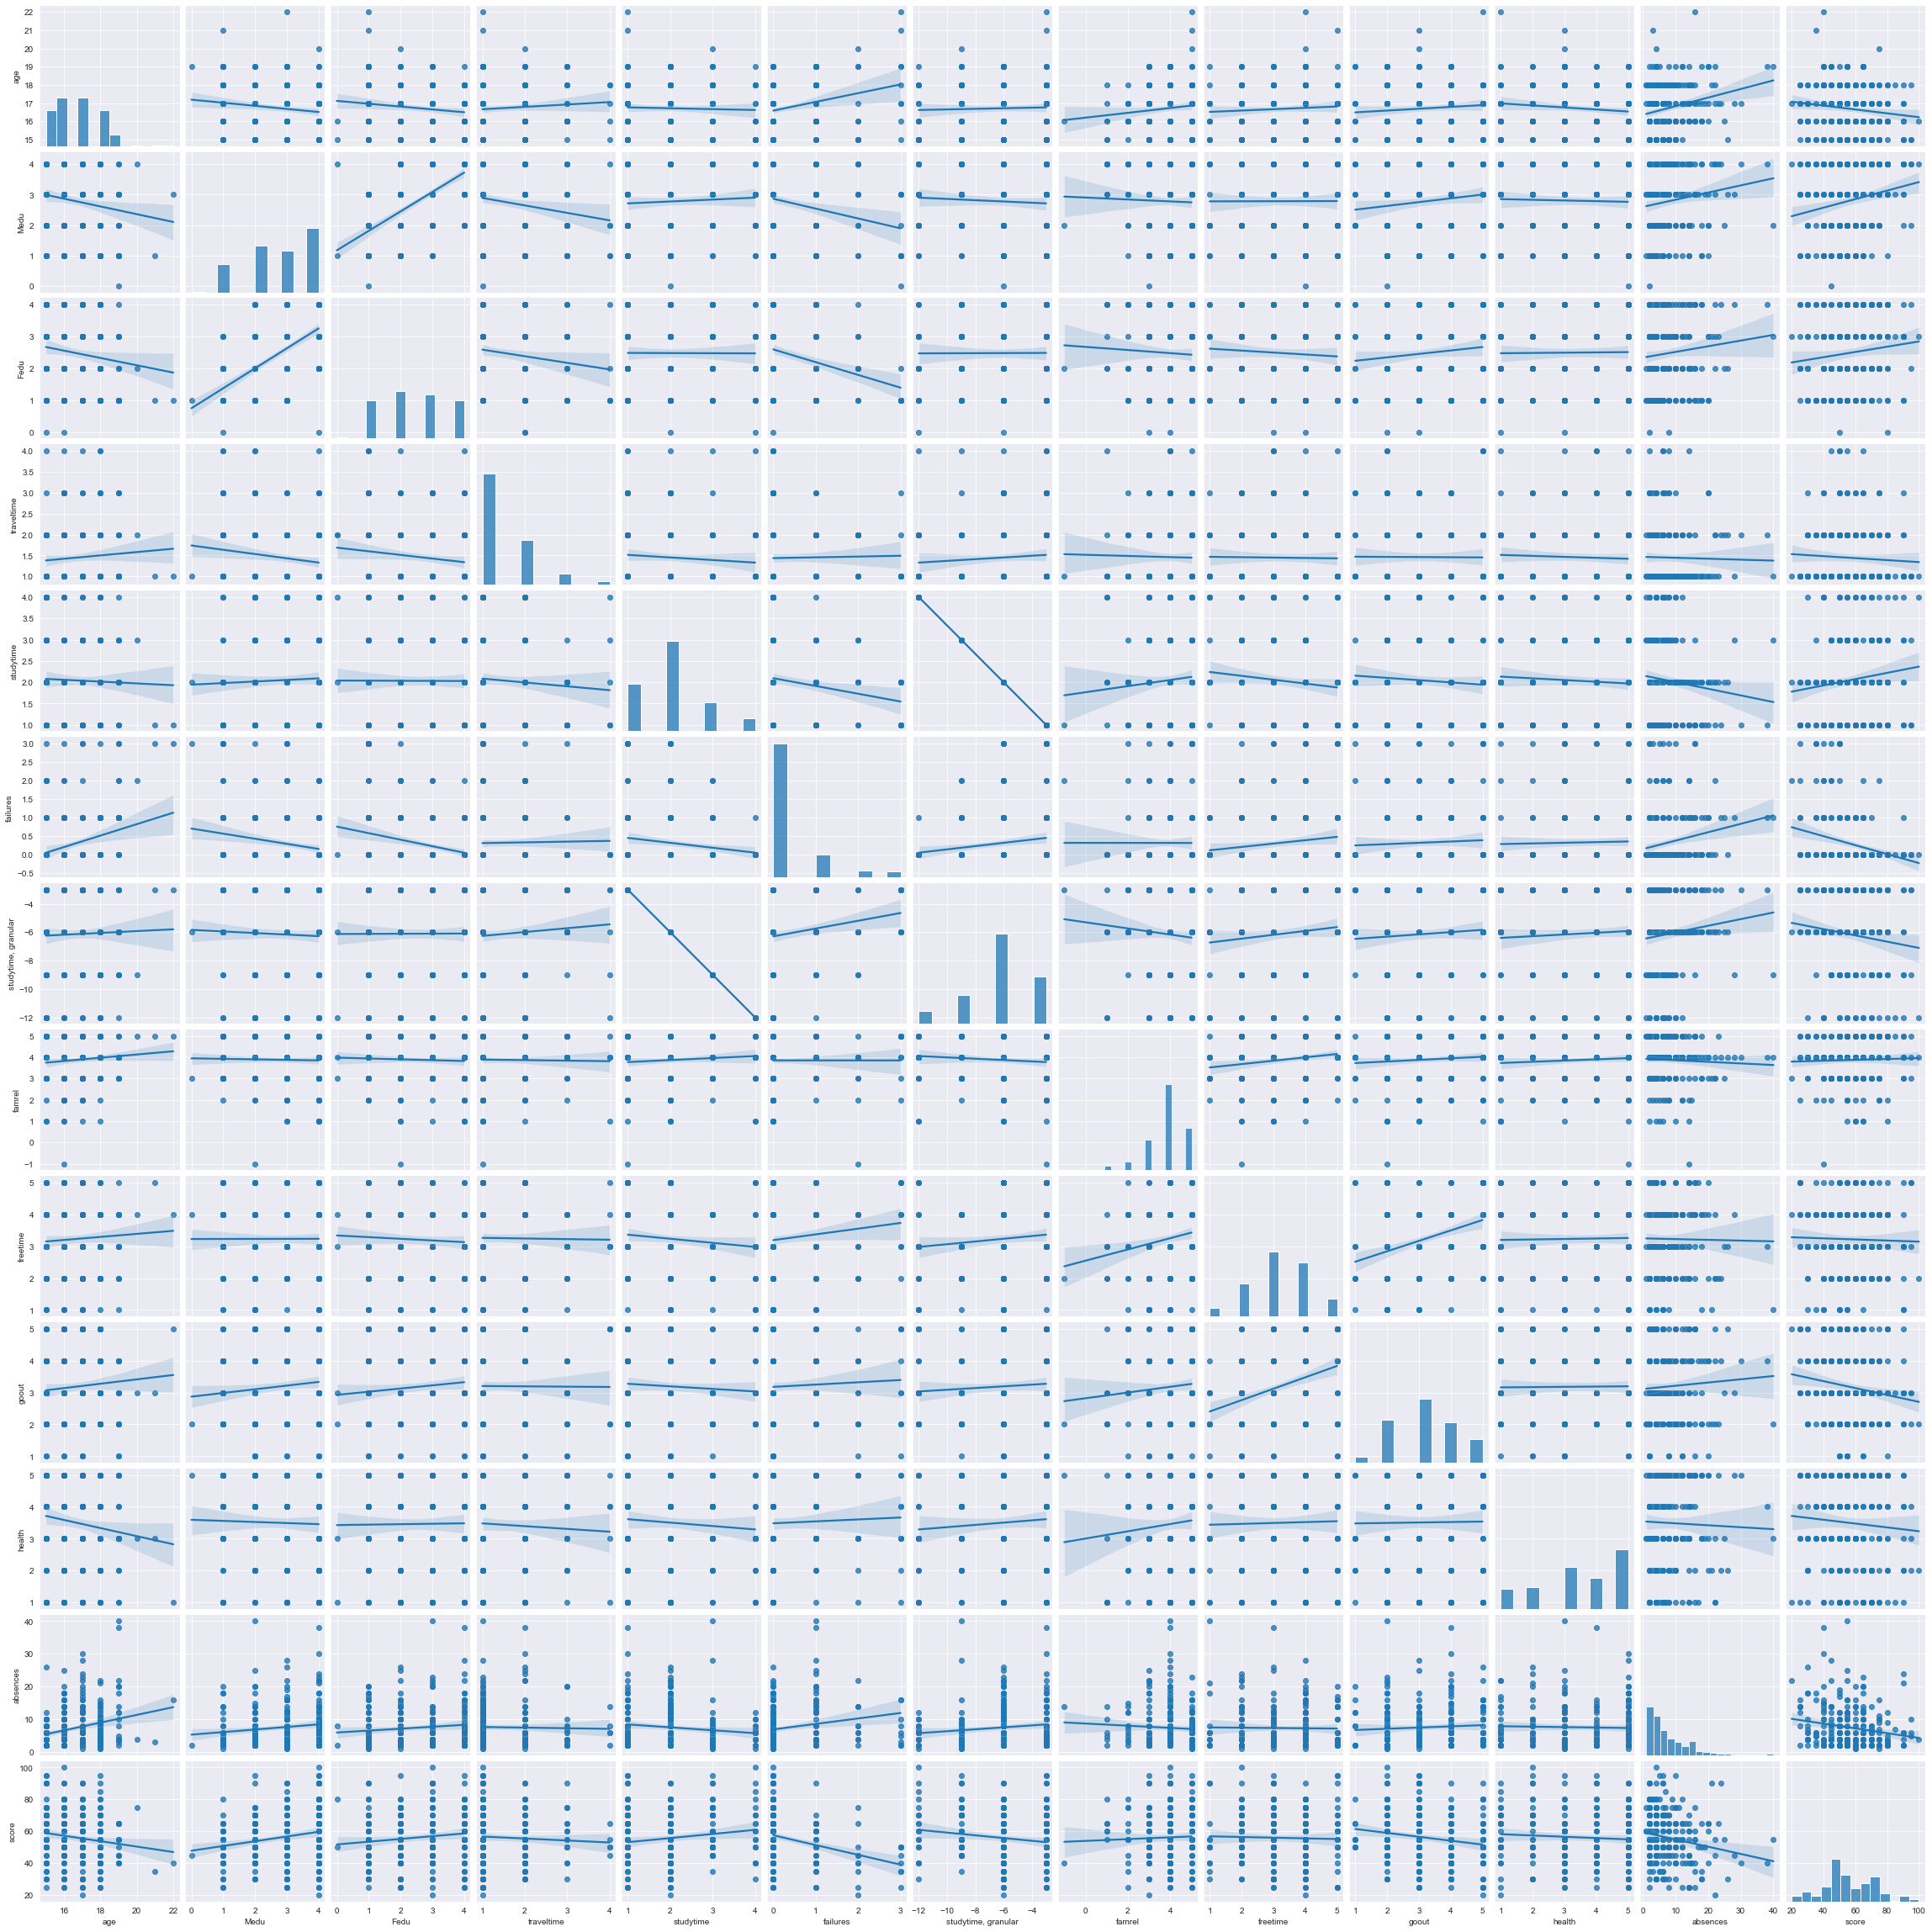

In [20]:
sns.pairplot(stud, kind = 'reg')

In [21]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146886,-0.133553,0.072173,-0.031806,0.271398,0.031806,0.100494,0.059263,0.082643,-0.118761,0.235739,-0.134211
Medu,-0.146886,1.000000,0.632304,-0.158367,0.048008,-0.211171,-0.048008,-0.027660,0.002009,0.119728,-0.027508,0.135762,0.204254
Fedu,-0.133553,0.632304,1.000000,-0.133884,-0.003685,-0.265065,0.003685,-0.043690,-0.056315,0.103577,0.010977,0.102123,0.119000
traveltime,0.072173,-0.158367,-0.133884,1.000000,-0.074624,0.019242,0.074624,-0.018807,-0.013751,-0.006724,-0.044791,-0.020688,-0.054271
studytime,-0.031806,0.048008,-0.003685,-0.074624,1.000000,-0.155533,-1.000000,0.082281,-0.107720,-0.065170,-0.065565,-0.117952,0.137647
failures,0.271398,-0.211171,-0.265065,0.019242,-0.155533,1.000000,0.155533,-0.000634,0.127291,0.049909,0.032390,0.194375,-0.272171
"studytime, granular",0.031806,-0.048008,0.003685,0.074624,-1.000000,0.155533,1.000000,-0.082281,0.107720,0.065170,0.065565,0.117952,-0.137647
famrel,0.100494,-0.027660,-0.043690,-0.018807,0.082281,-0.000634,-0.082281,1.000000,0.167032,0.081769,0.080666,-0.049861,0.033694
freetime,0.059263,0.002009,-0.056315,-0.013751,-0.107720,0.127291,0.107720,0.167032,1.000000,0.341360,0.020350,-0.014333,-0.027092
goout,0.082643,0.119728,0.103577,-0.006724,-0.065170,0.049909,0.065170,0.081769,0.341360,1.000000,0.010995,0.061084,-0.162643


Здесь мы наблюдаем, что все признаки слабо коррелируют, однако их совокупность может влиять на итоговый результат, поэтому стоит оставить как есть 


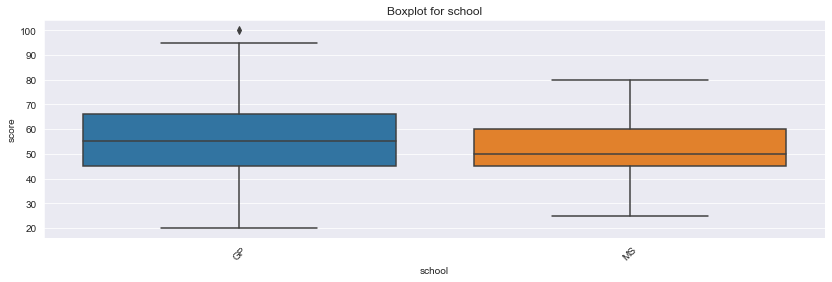

None


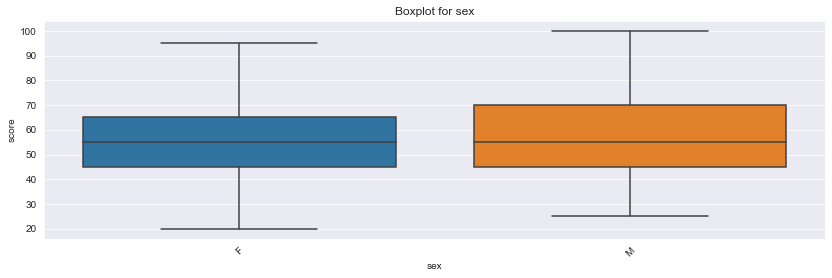

None


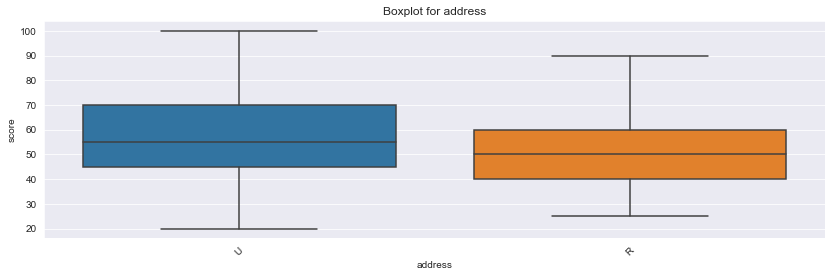

None


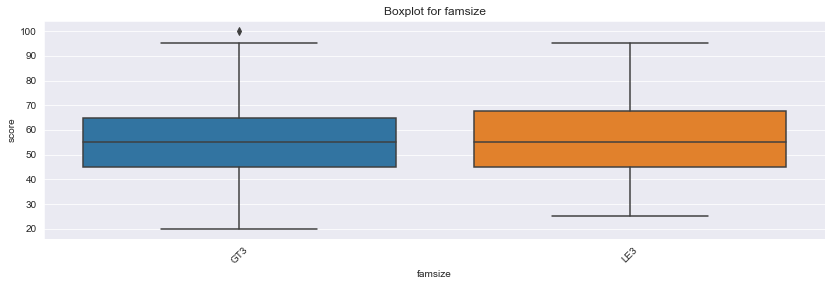

None


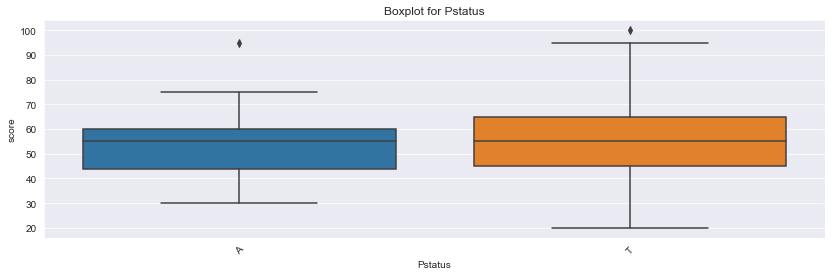

None


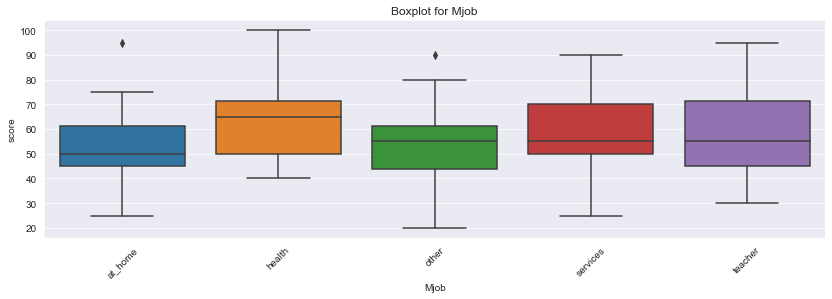

None


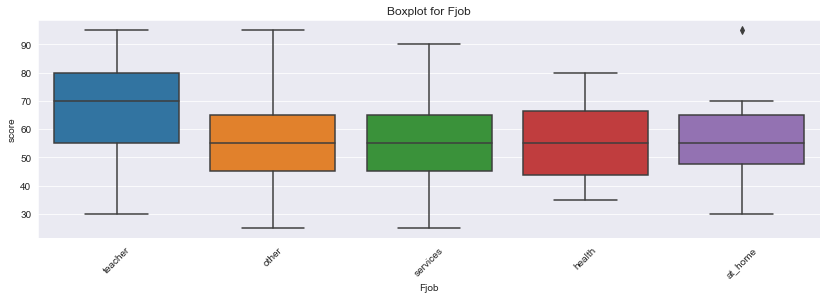

None


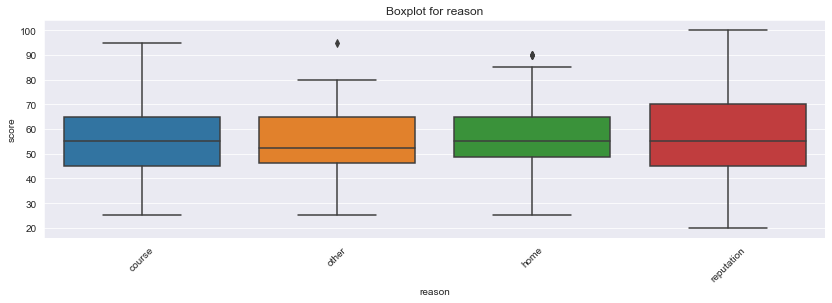

None


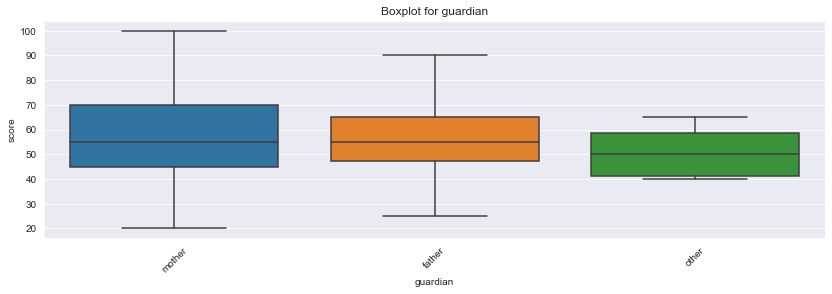

None


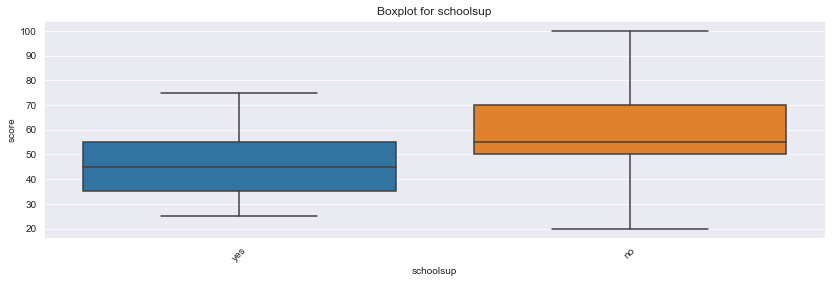

None


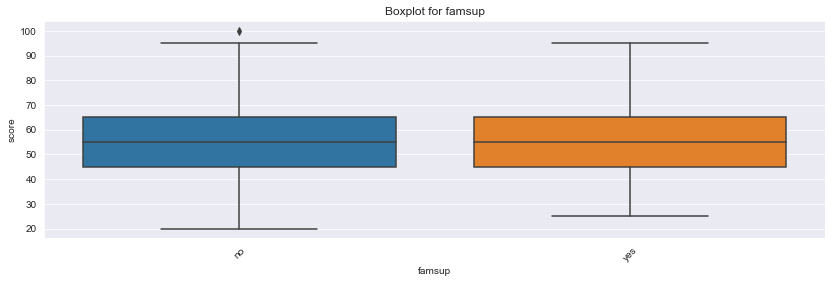

None


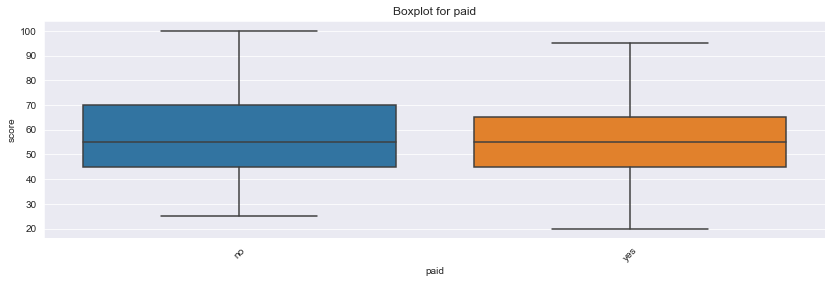

None


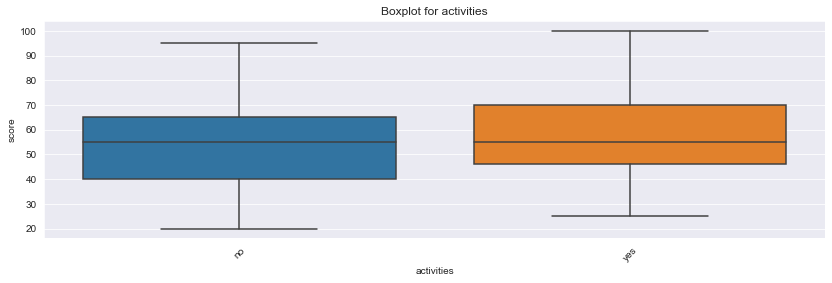

None


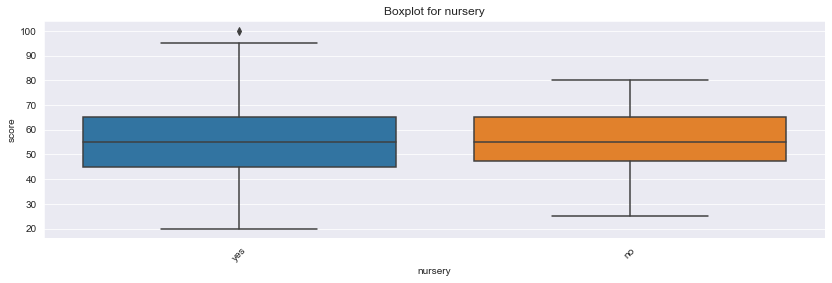

None


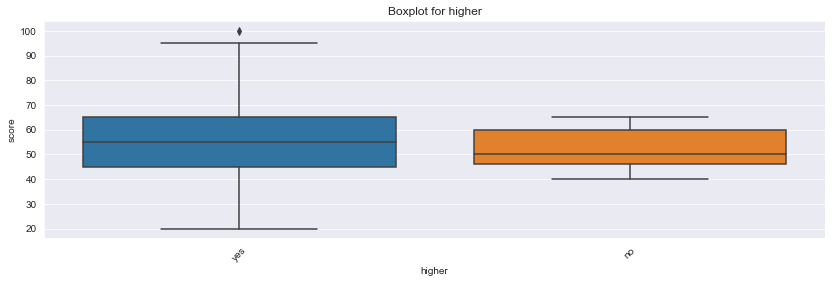

None


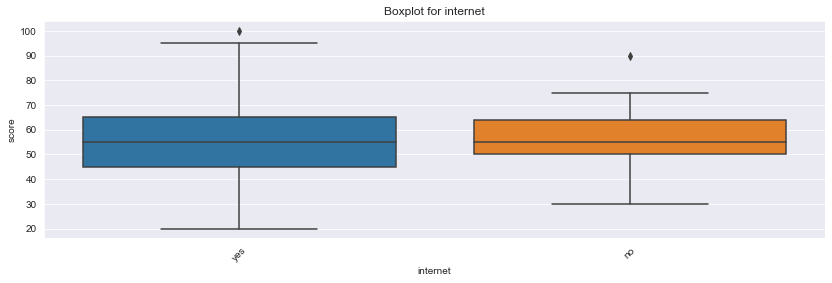

None


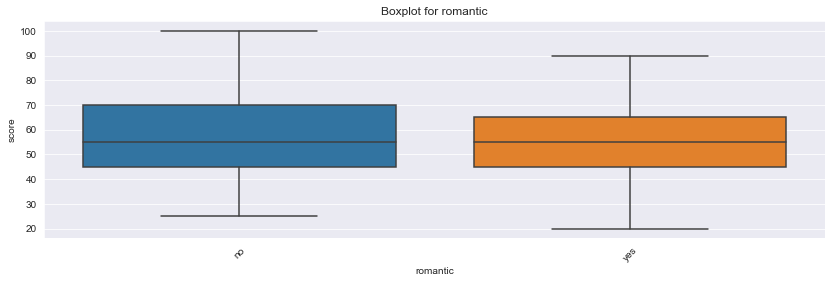

None


In [22]:
for columns in stud.columns:
  if columns in ['score', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                 'failures', 'studytime, granular', 'famrel', 'freetime',
                 'goout', 'health', 'absences']:
    continue
  else:    
    print(get_boxplot(columns))

Похоже, что все качественные признаки могут влиять на параметр оценки экзамена (score), поэтому стоит их проверить с помощью теста Стьюдента

In [23]:
for columns in stud.columns:
  if columns in ['score', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                 'failures', 'studytime, granular', 'famrel', 'freetime',
                 'goout', 'health', 'absences']:
    continue
  else:    
    print(get_stat_dif(columns))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


Тест Стьюдента также не выявил никаних отклонений, так что для итоговой модели может использоваться весь датасет.


In [24]:
stud_for_model = stud
stud_for_model.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# 4. Выводы

Итак, в результате EDA для анализа влияния параметров, влияющих на успешность сдачи школьных экзаменов, можно сделать следующие выводы:


1.   Пустых значений достаточно мало, их кол-во не превышает в общей сложности 10%, только показатель paid  выходит за эти рамки 
2.   Выбросы были найдены только только в столбцах Fedu, absences и score, данные выбросы не многочислены, что говорит нам о том, что данные достаточно чисты
3. Положительная корреляция с уровнем образования родителей и количеством дополнительного времени на учебу помимо школы говорит о том, что они положительно влияют итоговый результат по математике. Чем выше уровень образования родителей, и чем больше тратится дополнительного времени на учебу, тем лучше пишется тест
4. На основе данной работы самыми важными параметрами для постоения будущей модели я предлагаю использовать количественные параметры, корреляция которых превышает 0.1 по модулю, так как они сильнее всего могут влиять на итоговую оценку, а среди качественных признаков, можно использовать все

